In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [157]:
df=pd.read_csv('hotel_bookings.csv')

In [158]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [160]:
df.shape

(119390, 32)

In [161]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [162]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [163]:
df.duplicated().sum()

31994

In [164]:
df = df.drop_duplicates()

In [165]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [166]:
df.loc[:, 'children'] = df['children'].fillna(0)

In [167]:
df['country'].isnull().sum()

452

In [168]:
mode_country = df['country'].mode()[0]  # get the most frequent country
df.loc[:, 'country'] = df['country'].fillna(mode_country)

df['country'].mode()[0] finds the most frequent country value.

.fillna(mode_country) replaces all null values in the country column with that mode.

Using .loc[:, 'country'] = avoids the SettingWithCopyWarning.

In [169]:
df.loc[:, 'agent'] = df['agent'].fillna(0)
df.loc[:, 'company'] = df['company'].fillna(0)

In [170]:
df.loc[:, 'hotel'] = df['hotel'].astype('category')


In [171]:
df = df.astype({'is_canceled': 'bool'})

In [172]:
df['arrival_date_year'] = df['arrival_date_year'].astype('category')

In [173]:
df['arrival_date_month'] = df['arrival_date_month'].astype('category')

In [174]:
df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + '-' +
    df['arrival_date_month'].astype(str) + '-' +
    df['arrival_date_day_of_month'].astype(str),
    format='%Y-%B-%d', errors='coerce'
)


In [175]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
119385,City Hotel,False,23,2017,August,35,30,2,5,2,...,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30
119386,City Hotel,False,102,2017,August,35,31,2,5,3,...,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31
119387,City Hotel,False,34,2017,August,35,31,2,5,2,...,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31
119388,City Hotel,False,109,2017,August,35,31,2,5,2,...,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31
119389,City Hotel,False,205,2017,August,35,29,2,7,2,...,9.0,0.0,0,Transient,151.20,0,2,Check-Out,2017-09-07,2017-08-29


In [176]:
df.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], axis=1, inplace=True)

In [177]:
df.loc[:, 'children'] = df['children'].astype('int')


In [178]:
df['meal'] = df['meal'].replace('Undefined', 'Not Specified')
df['market_segment'] = df['market_segment'].replace('Undefined', 'Not Specified')
df['distribution_channel'] = df['distribution_channel'].replace('Undefined', 'Not Specified')

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  object        
 1   is_canceled                     87396 non-null  bool          
 2   lead_time                       87396 non-null  int64         
 3   arrival_date_week_number        87396 non-null  int64         
 4   stays_in_weekend_nights         87396 non-null  int64         
 5   stays_in_week_nights            87396 non-null  int64         
 6   adults                          87396 non-null  int64         
 7   children                        87396 non-null  float64       
 8   babies                          87396 non-null  int64         
 9   meal                            87396 non-null  object        
 10  country                         87396 non-null  object        
 11  market

Key drivers of booking cancellations (is_canceled)

In [180]:
country_mapping = {
    'PRT': 'Portugal',
    'GBR': 'United Kingdom',
    'USA': 'United States',
    'ESP': 'Spain',
    'IRL': 'Ireland',
    'FRA': 'France',
    'ROU': 'Romania',
    'NOR': 'Norway',
    'OMN': 'Oman',
    'ARG': 'Argentina',
    'POL': 'Poland',
    'DEU': 'Germany',
    'BEL': 'Belgium',
    'CHE': 'Switzerland',
    'CN': 'China',  
    'GRC': 'Greece',
    'ITA': 'Italy',
    'NLD': 'Netherlands',
    'DNK': 'Denmark',
    'RUS': 'Russia',
    'SWE': 'Sweden',
    'AUS': 'Australia',
    'EST': 'Estonia',
    'CZE': 'Czech Republic',
    'BRA': 'Brazil',
    'FIN': 'Finland',
    'MOZ': 'Mozambique',
    'BWA': 'Botswana',
    'LUX': 'Luxembourg',
    'SVN': 'Slovenia',
    'ALB': 'Albania',
    'IND': 'India',
    'CHN': 'China',
    'MEX': 'Mexico',
    'MAR': 'Morocco',
    'UKR': 'Ukraine',
    'SMR': 'San Marino',
    'LVA': 'Latvia',
    'PRI': 'Puerto Rico',
    'SRB': 'Serbia',
    'CHL': 'Chile',
    'AUT': 'Austria',
    'BLR': 'Belarus',
    'LTU': 'Lithuania',
    'TUR': 'Turkey',
    'ZAF': 'South Africa',
    'AGO': 'Angola',
    'ISR': 'Israel',
    'CYM': 'Cayman Islands',
    'ZMB': 'Zambia',
    'CPV': 'Cape Verde',
    'ZWE': 'Zimbabwe',
    'DZA': 'Algeria',
    'KOR': 'South Korea',
    'CRI': 'Costa Rica',
    'HUN': 'Hungary',
    'ARE': 'United Arab Emirates',
    'TUN': 'Tunisia',
    'JAM': 'Jamaica',
    'HRV': 'Croatia',
    'HKG': 'Hong Kong',
    'IRN': 'Iran',
    'GEO': 'Georgia',
    'AND': 'Andorra',
    'GIB': 'Gibraltar',
    'URY': 'Uruguay',
    'JEY': 'Jersey',
    'CAF': 'Central African Republic',
    'CYP': 'Cyprus',
    'COL': 'Colombia',
    'GGY': 'Guernsey',
    'KWT': 'Kuwait',
    'NGA': 'Nigeria',
    'MDV': 'Maldives',
    'VEN': 'Venezuela',
    'SVK': 'Slovakia',
    'FJI': 'Fiji',
    'KAZ': 'Kazakhstan',
    'PAK': 'Pakistan',
    'IDN': 'Indonesia',
    'LBN': 'Lebanon',
    'PHL': 'Philippines',
    'SEN': 'Senegal',
    'SYC': 'Seychelles',
    'AZE': 'Azerbaijan',
    'BHR': 'Bahrain',
    'NZL': 'New Zealand',
    'THA': 'Thailand',
    'DOM': 'Dominican Republic',
    'MKD': 'North Macedonia',
    'MYS': 'Malaysia',
    'ARM': 'Armenia',
    'JPN': 'Japan',
    'LKA': 'Sri Lanka',
    'CUB': 'Cuba',
    'CMR': 'Cameroon',
    'BIH': 'Bosnia and Herzegovina',
    'MUS': 'Mauritius',
    'COM': 'Comoros',
    'SUR': 'Suriname',
    'UGA': 'Uganda',
    'BGR': 'Bulgaria',
    'CIV': "Côte d'Ivoire",
    'JOR': 'Jordan',
    'SYR': 'Syria',
    'SGP': 'Singapore',
    'BDI': 'Burundi',
    'SAU': 'Saudi Arabia',
    'VNM': 'Vietnam',
    'PLW': 'Palau',
    'QAT': 'Qatar',
    'EGY': 'Egypt',
    'PER': 'Peru',
    'MLT': 'Malta',
    'MWI': 'Malawi',
    'ECU': 'Ecuador',
    'MDG': 'Madagascar',
    'ISL': 'Iceland',
    'UZB': 'Uzbekistan',
    'NPL': 'Nepal',
    'BHS': 'Bahamas',
    'MAC': 'Macau',
    'TGO': 'Togo',
    'TWN': 'Taiwan',
    'DJI': 'Djibouti',
    'STP': 'São Tomé and Príncipe',
    'KNA': 'Saint Kitts and Nevis',
    'ETH': 'Ethiopia',
    'IRQ': 'Iraq',
    'HND': 'Honduras',
    'RWA': 'Rwanda',
    'KHM': 'Cambodia',
    'MCO': 'Monaco',
    'BGD': 'Bangladesh',
    'IMN': 'Isle of Man',
    'TJK': 'Tajikistan',
    'NIC': 'Nicaragua',
    'BEN': 'Benin',
    'VGB': 'British Virgin Islands',
    'TZA': 'Tanzania',
    'GAB': 'Gabon',
    'GHA': 'Ghana',
    'TMP': 'Timor-Leste',
    'GLP': 'Guadeloupe',
    'KEN': 'Kenya',
    'LIE': 'Liechtenstein',
    'GNB': 'Guinea-Bissau',
    'MNE': 'Montenegro',
    'UMI': 'United States Minor Outlying Islands',
    'MYT': 'Mayotte',
    'FRO': 'Faroe Islands',
    'MMR': 'Myanmar',
    'PAN': 'Panama',
    'BFA': 'Burkina Faso',
    'LBY': 'Libya',
    'MLI': 'Mali',
    'NAM': 'Namibia',
    'BOL': 'Bolivia',
    'PRY': 'Paraguay',
    'BRB': 'Barbados',
    'ABW': 'Aruba',
    'AIA': 'Anguilla',
    'SLV': 'El Salvador',
    'DMA': 'Dominica',
    'PYF': 'French Polynesia',
    'GUY': 'Guyana',
    'LCA': 'Saint Lucia',
    'ATA': 'Antarctica',
    'GTM': 'Guatemala',
    'ASM': 'American Samoa',
    'MRT': 'Mauritania',
    'NCL': 'New Caledonia',
    'KIR': 'Kiribati',
    'SDN': 'Sudan',
    'ATF': 'French Southern Territories',
    'SLE': 'Sierra Leone',
    'LAO': 'Laos'
}
df['country'] = df['country'].map(country_mapping)

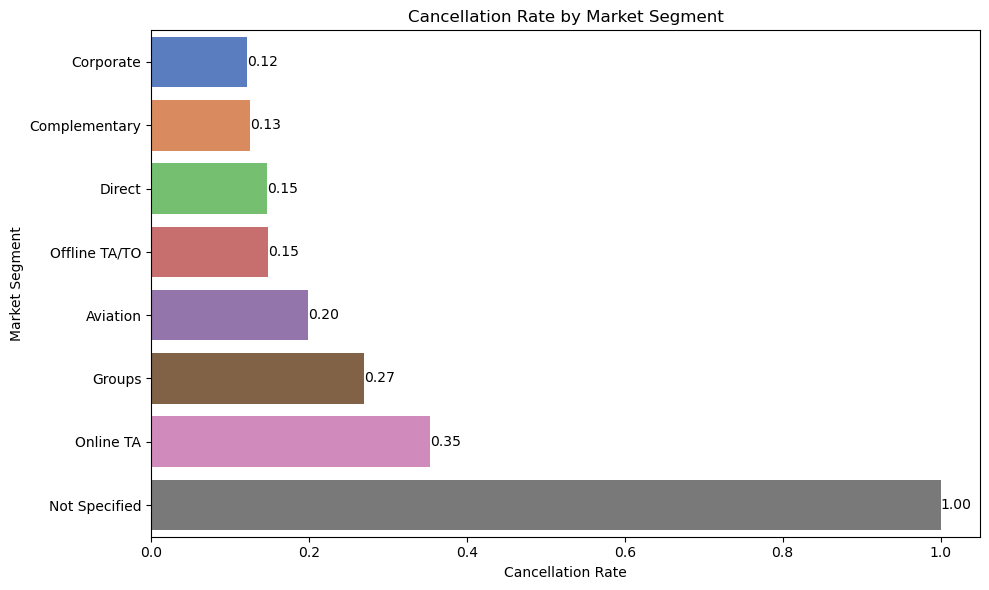

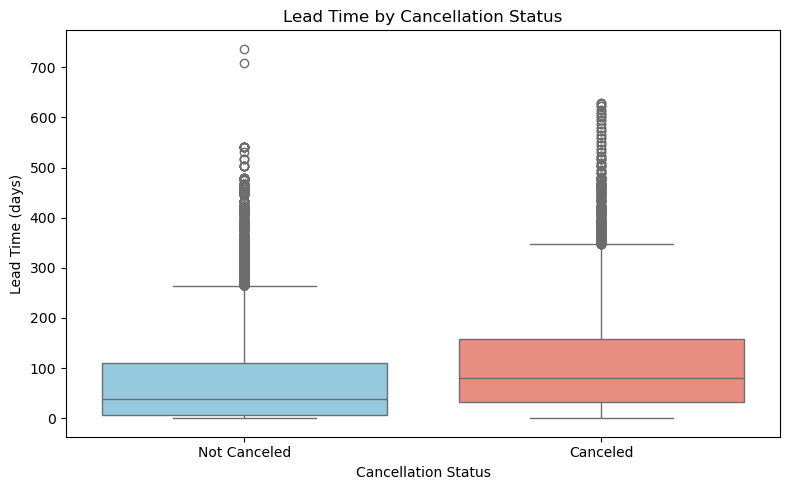

In [181]:
sns.set_palette('Set2')

# Cancellation rate by market segment
market_cancel = df.groupby('market_segment')['is_canceled'].mean().sort_values().reset_index()

# Plot: Cancellation Rate by Market Segment
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=market_cancel, y='market_segment', x='is_canceled', palette='muted', orient='h')
plt.title('Cancellation Rate by Market Segment')
plt.xlabel('Cancellation Rate')
plt.ylabel('Market Segment')
for container in bar.containers:
    bar.bar_label(container, fmt='%.2f')
plt.tight_layout()
plt.show()

# First, map boolean values to strings for clarity and palette mapping
df['is_canceled_label'] = df['is_canceled'].map({False: 'Not Canceled', True: 'Canceled'})

plt.figure(figsize=(8, 5))
box = sns.boxplot(
    x='is_canceled_label',
    y='lead_time',
    data=df,
    palette={'Not Canceled': 'skyblue', 'Canceled': 'salmon'}
)
plt.title('Lead Time by Cancellation Status')
plt.xlabel('Cancellation Status')
plt.ylabel('Lead Time (days)')

# Legend is now handled automatically, but you can still add a manual one if needed
plt.tight_layout()
plt.show()


Effect of lead time on cancellation and ADR

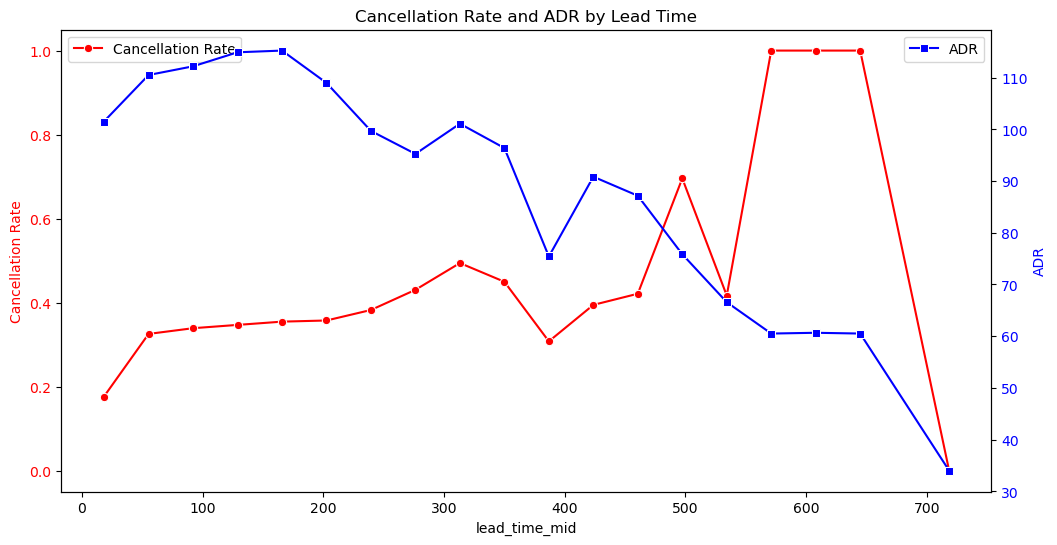

In [182]:
# Create lead time bins
df['lead_time_bin'] = pd.cut(df['lead_time'], bins=20)

# Group by bins and compute means
lead_time_cancel = df.groupby('lead_time_bin', observed=False)['is_canceled'].mean().reset_index()
lead_time_adr = df.groupby('lead_time_bin', observed=False)['adr'].mean().reset_index()

# Extract midpoints of bins
lead_time_cancel['lead_time_mid'] = lead_time_cancel['lead_time_bin'].apply(lambda x: x.mid)
lead_time_adr['lead_time_mid'] = lead_time_adr['lead_time_bin'].apply(lambda x: x.mid)

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.lineplot(data=lead_time_cancel, x='lead_time_mid', y='is_canceled', ax=ax1, label='Cancellation Rate', color='red',marker='o')
ax1.set_ylabel('Cancellation Rate', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
sns.lineplot(data=lead_time_adr, x='lead_time_mid', y='adr', ax=ax2, label='ADR', color='blue',marker='s')
ax2.set_ylabel('ADR', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Cancellation Rate and ADR by Lead Time')
plt.xticks(rotation=45)
plt.show()

Impact of booking changes on cancellations and ADR

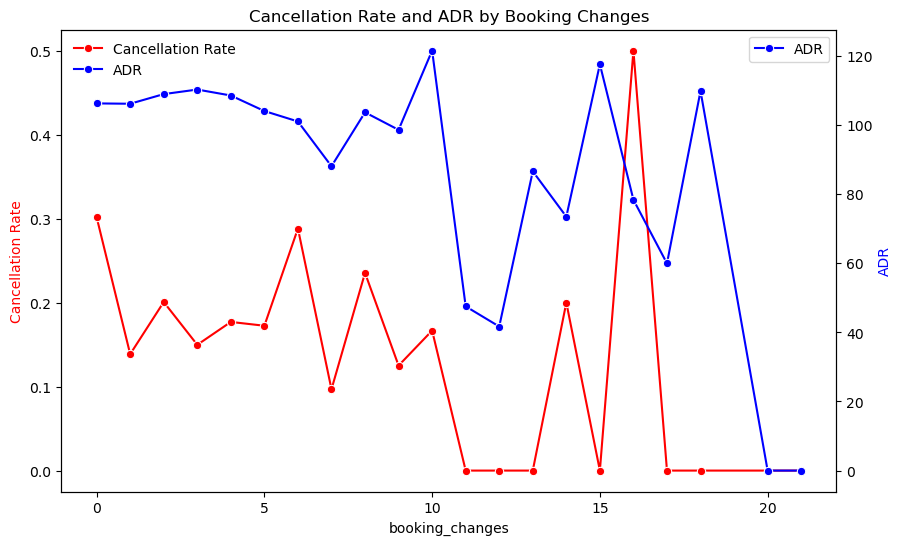

In [183]:
booking_changes_cancel = df.groupby('booking_changes')['is_canceled'].mean().reset_index()
booking_changes_adr = df.groupby('booking_changes')['adr'].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

sns.lineplot(data=booking_changes_cancel, x='booking_changes', y='is_canceled', ax=ax1,
             label='Cancellation Rate', color='red', marker='o')
ax1.set_ylabel('Cancellation Rate', color='red')

ax2 = ax1.twinx()
sns.lineplot(data=booking_changes_adr, x='booking_changes', y='adr', ax=ax2,
             label='ADR', color='blue', marker='o')
ax2.set_ylabel('ADR', color='blue')

plt.title('Cancellation Rate and ADR by Booking Changes')

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', frameon=False)

plt.show()


Market segments and distribution channels effect

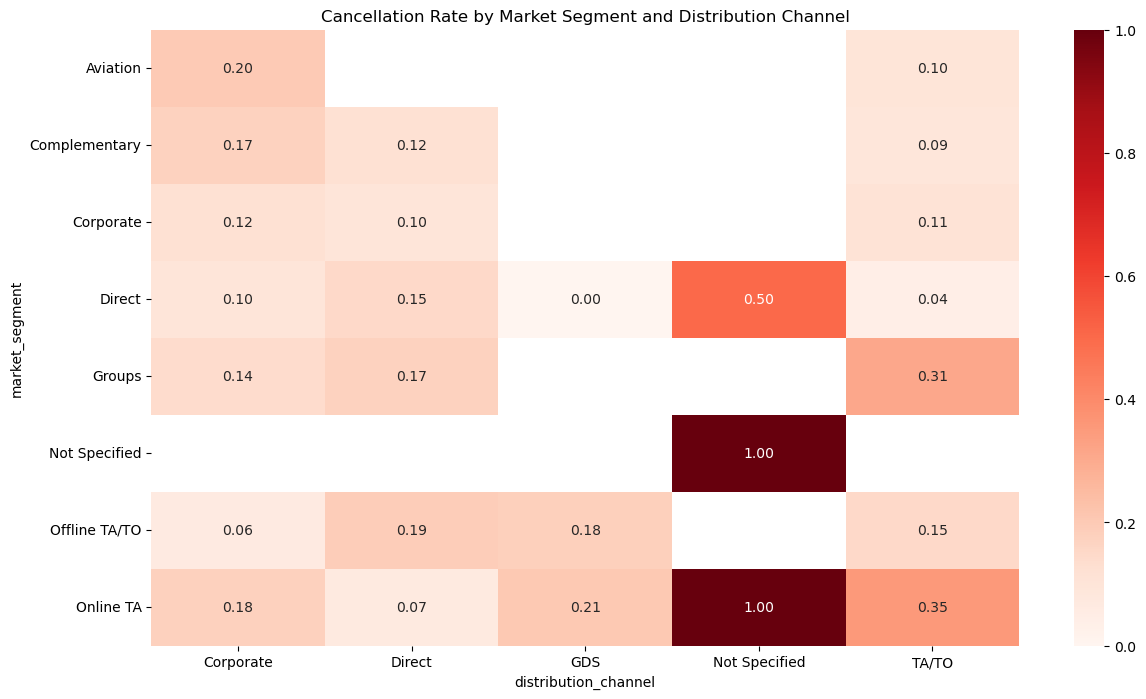

In [184]:
# Grouping by market segment and distribution channel to get cancellation rates
cancel_segment_channel = df.groupby(['market_segment', 'distribution_channel'])['is_canceled'].mean().reset_index()

# Creating pivot table with named parameters
pivot_table = cancel_segment_channel.pivot(
    index='market_segment', 
    columns='distribution_channel', 
    values='is_canceled'
)

# Plotting heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    pivot_table,
    annot=True, 
    fmt=".2f", 
    cmap='Reds'
)
plt.title('Cancellation Rate by Market Segment and Distribution Channel')
plt.show()

Guest composition impact on stay and cancellations

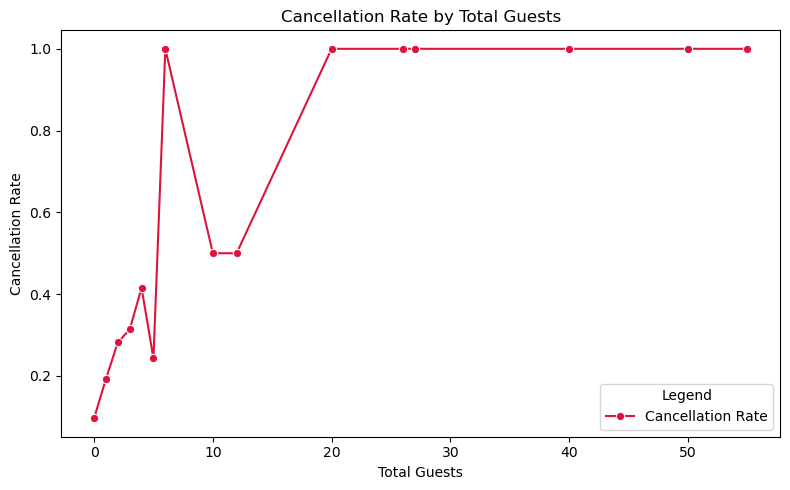

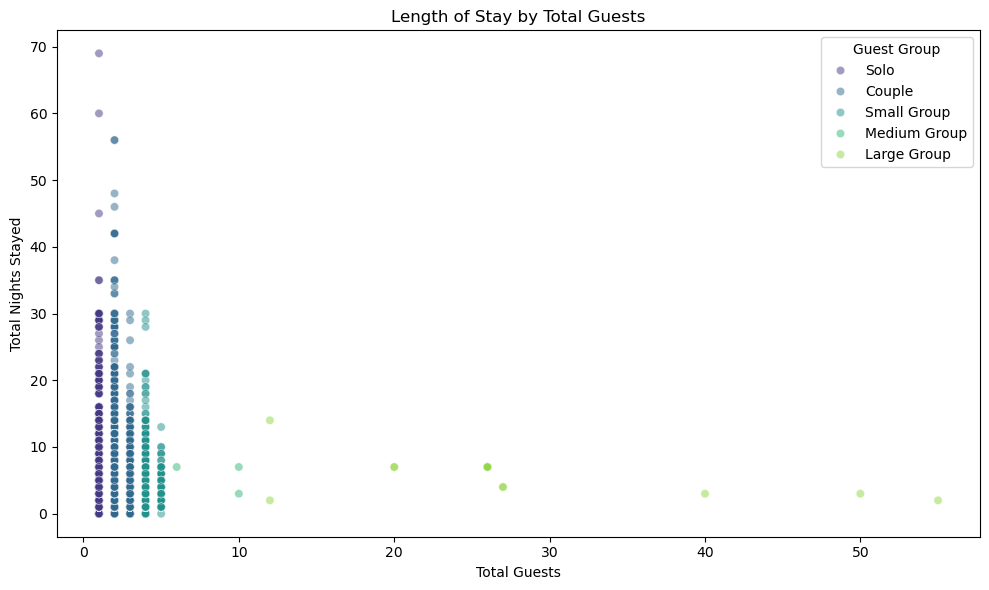

In [185]:
# Creating total guests column
df['total_guests'] = df['adults'] + df['children'] + df['babies']

# Cancellation rate by number of guests
guest_cancel = df.groupby('total_guests')['is_canceled'].mean().reset_index()

plt.figure(figsize=(8, 5))
line = sns.lineplot(data=guest_cancel, x='total_guests', y='is_canceled', color='crimson', marker='o')
plt.title('Cancellation Rate by Total Guests')
plt.xlabel('Total Guests')
plt.ylabel('Cancellation Rate')
line.legend(['Cancellation Rate'], title='Legend')
plt.tight_layout()
plt.show()

# Creating total nights column
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']


df['guest_group'] = pd.cut(df['total_guests'], bins=[0, 1, 3, 5, 10, df['total_guests'].max()],
                           labels=['Solo', 'Couple', 'Small Group', 'Medium Group', 'Large Group'])

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='total_guests', y='total_nights', data=df,
                          hue='guest_group', palette='viridis', alpha=0.5)

plt.title('Length of Stay by Total Guests')
plt.xlabel('Total Guests')
plt.ylabel('Total Nights Stayed')
plt.legend(title='Guest Group')
plt.tight_layout()
plt.show()


Special requests and their impact

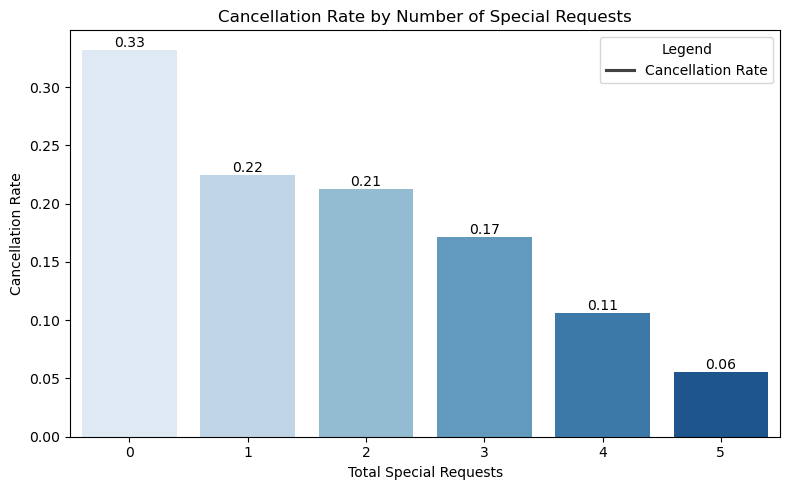

In [186]:
# Grouping and calculate mean cancellation rate by special requests
special_req_cancel = df.groupby('total_of_special_requests')['is_canceled'].mean().reset_index()

# Creating a color palette (e.g., using a gradient for visual interest)
colors = sns.color_palette("Blues", n_colors=special_req_cancel.shape[0])

plt.figure(figsize=(8, 5))
bar = sns.barplot(data=special_req_cancel,
                  x='total_of_special_requests',
                  y='is_canceled',
                  palette=colors)

plt.title('Cancellation Rate by Number of Special Requests')
plt.xlabel('Total Special Requests')
plt.ylabel('Cancellation Rate')

# Add bar labels
for container in bar.containers:
    bar.bar_label(container, fmt='%.2f')

# This will Manually add a legend (since there's no hue)
plt.legend(['Cancellation Rate'], title='Legend')
plt.tight_layout()
plt.show()


Repeated guests behavior

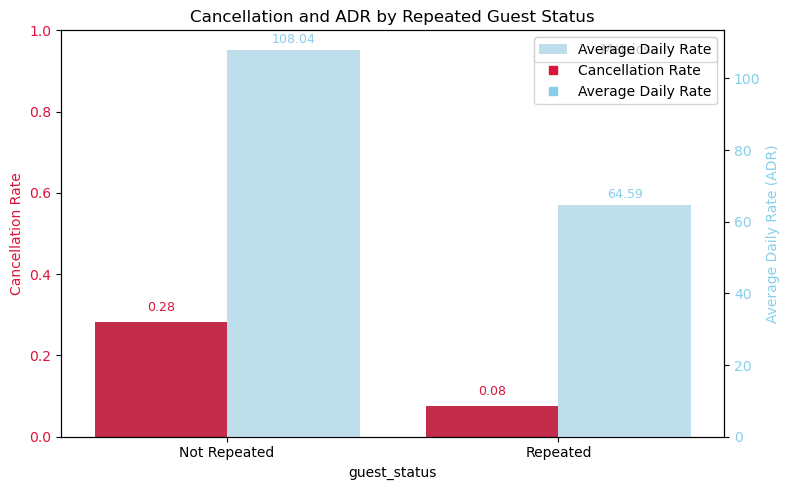

In [187]:
# Create a new column to define guest status (Repeated or Not)
df['guest_status'] = df['is_repeated_guest'].apply(lambda x: 'Repeated' if x == 1 else 'Not Repeated')

# Grouped DataFrames
repeat_cancel = df.groupby('guest_status', as_index=False)['is_canceled'].mean()
repeat_adr = df.groupby('guest_status', as_index=False)['adr'].mean()


fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot Cancellation Rate
sns.barplot(x='guest_status', y='is_canceled', data=repeat_cancel,
            ax=ax1, color='crimson', label='Cancellation Rate', width=0.4)
ax1.set_ylabel('Cancellation Rate', color='crimson')
ax1.tick_params(axis='y', labelcolor='crimson')
ax1.set_ylim(0, 1)

# Plot ADR on secondary axis
ax2 = ax1.twinx()
sns.barplot(x='guest_status', y='adr', data=repeat_adr,
            ax=ax2, color='skyblue', alpha=0.6, label='Average Daily Rate', width=0.4)
ax2.set_ylabel('Average Daily Rate (ADR)', color='skyblue')
ax2.tick_params(axis='y', labelcolor='skyblue')

# Shift bars to avoid overlap
for bar in ax1.patches:
    bar.set_x(bar.get_x() - 0.2)
for bar in ax2.patches:
    bar.set_x(bar.get_x() + 0.2)

# Add value labels on top of bars for ax1 (Cancellation Rate)
for bar in ax1.patches:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height + 0.02,  # Slightly above the bar
             f'{height:.2f}', ha='center', va='bottom', color='crimson', fontsize=9)

# Add value labels on top of bars for ax2 (ADR)
for bar in ax2.patches:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height + (ax2.get_ylim()[1] * 0.01),  # Slightly above
             f'{height:.2f}', ha='center', va='bottom', color='skyblue', fontsize=9)

# Combined legend
handles = [
    plt.Line2D([], [], color='crimson', marker='s', linestyle='', label='Cancellation Rate'),
    plt.Line2D([], [], color='skyblue', marker='s', linestyle='', label='Average Daily Rate')
]
ax1.legend(handles=handles, loc='upper right', title='Metrics')

plt.title('Cancellation and ADR by Repeated Guest Status')
plt.tight_layout()
plt.show()


Reservation status and waiting list

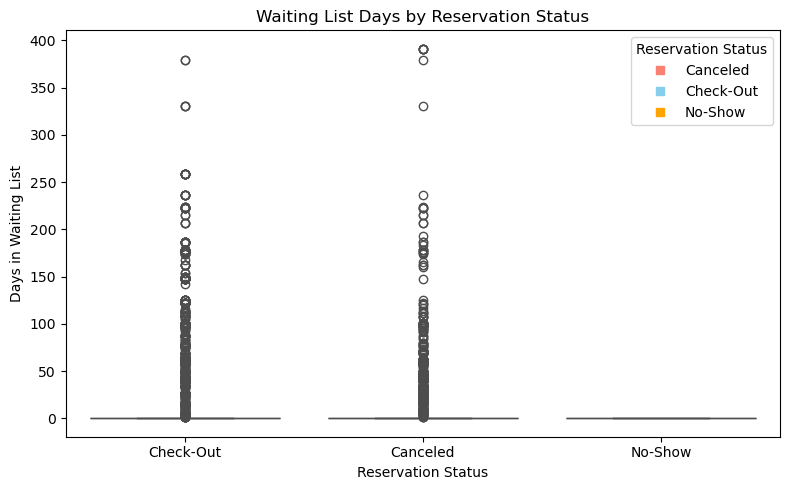

In [188]:
# Define a custom color palette for reservation statuses
status_palette = {
    'Canceled': 'salmon',
    'Check-Out': 'skyblue',
    'No-Show': 'orange'
}

plt.figure(figsize=(8, 5))
box = sns.boxplot(
    x='reservation_status',
    y='days_in_waiting_list',
    data=df,
    palette=status_palette
)
plt.title('Waiting List Days by Reservation Status')
plt.xlabel('Reservation Status')
plt.ylabel('Days in Waiting List')

# Create a manual legend
handles = [
    plt.Line2D([], [], color='salmon', marker='s', linestyle='', label='Canceled'),
    plt.Line2D([], [], color='skyblue', marker='s', linestyle='', label='Check-Out'),
    plt.Line2D([], [], color='orange', marker='s', linestyle='', label='No-Show')
]
plt.legend(handles=handles, title='Reservation Status')
plt.tight_layout()
plt.show()


Room type differences impact

In [189]:
room_type_cancel = df[df['reserved_room_type'] != df['assigned_room_type']]
cancel_rate_diff_room = room_type_cancel['is_canceled'].mean()
print(f"Cancellation rate when assigned room differs from reserved: {cancel_rate_diff_room:.2%}")

# ADR difference for mismatched room types
adr_diff_room = room_type_cancel['adr'].mean()
print(f"Average ADR for mismatched room types: {adr_diff_room:.2f}")


Cancellation rate when assigned room differs from reserved: 4.71%
Average ADR for mismatched room types: 84.14


Seasonal/weekly trends

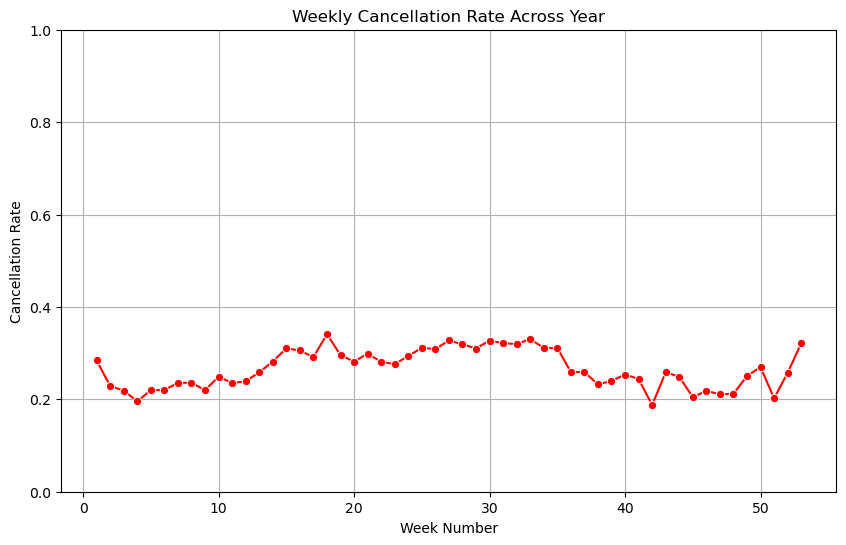

In [190]:
weekly_cancel = df.groupby('arrival_date_week_number', as_index=False)['is_canceled'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x='arrival_date_week_number', y='is_canceled', data=weekly_cancel, color='red', marker='o')

plt.title('Weekly Cancellation Rate Across Year')
plt.xlabel('Week Number')
plt.ylabel('Cancellation Rate')
plt.ylim(0, 1)  
plt.grid(True)  

plt.show()

Deposit type impact

Overall cancellation rate: 27.49%
  deposit_type  is_canceled
0   No Deposit     0.266849
1   Non Refund     0.947013
2   Refundable     0.242991


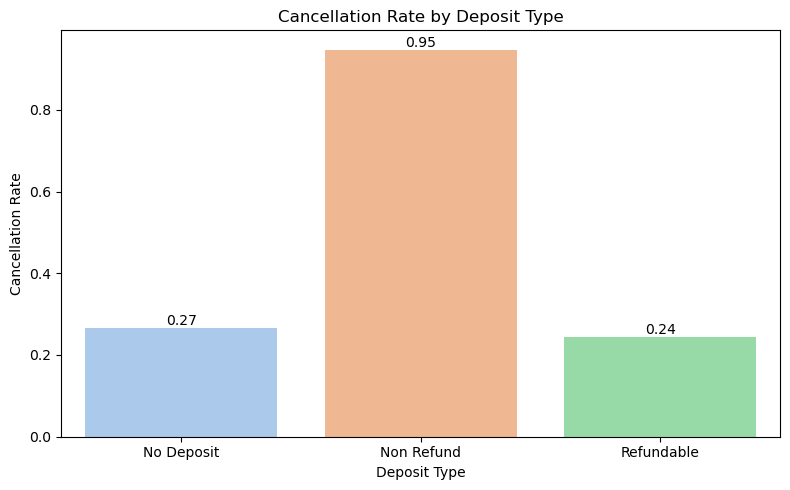

In [191]:
# Overall cancellation rate
cancel_rate = df['is_canceled'].mean()
print(f"Overall cancellation rate: {cancel_rate:.2%}")

# Cancellation rate by deposit_type
deposit_cancel = df.groupby('deposit_type')['is_canceled'].mean().reset_index()
print(deposit_cancel)

# Plot: Cancellation Rate by Deposit Type
plt.figure(figsize=(8, 5))
bar = sns.barplot(data=deposit_cancel, x='deposit_type', y='is_canceled', palette='pastel')
plt.title('Cancellation Rate by Deposit Type')
plt.ylabel('Cancellation Rate')
plt.xlabel('Deposit Type')
for container in bar.containers:
    bar.bar_label(container, fmt='%.2f')
plt.tight_layout()
plt.show()

Corporate vs individual bookings

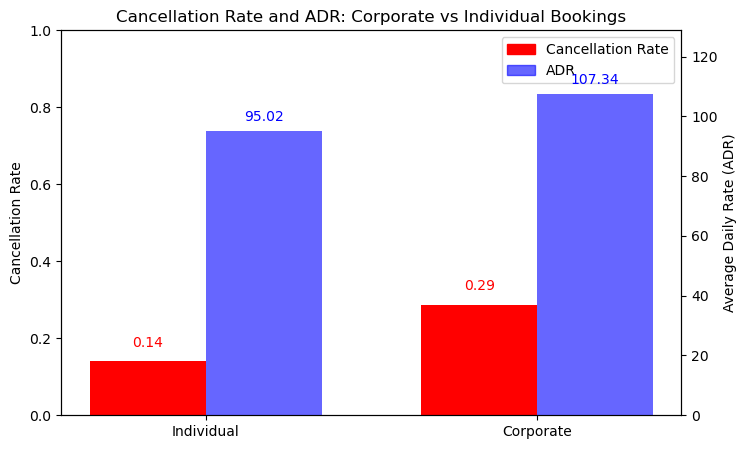

In [192]:
import matplotlib.patches as mpatches

df['corporate_booking'] = ((df['company'] > 0) | (df['agent'] > 0))

corp_cancel = df.groupby('corporate_booking')['is_canceled'].mean().reset_index()
corp_adr = df.groupby('corporate_booking')['adr'].mean().reset_index()

corp_cancel['corporate_booking'] = corp_cancel['corporate_booking'].map({True: 'Corporate', False: 'Individual'})
corp_adr['corporate_booking'] = corp_adr['corporate_booking'].map({True: 'Corporate', False: 'Individual'})

fig, ax1 = plt.subplots(figsize=(8, 5))

bar_width = 0.35
x = np.arange(len(corp_cancel['corporate_booking']))

# Plot cancellation rate bars on ax1
bars1 = ax1.bar(x - bar_width/2, corp_cancel['is_canceled'], width=bar_width, color='red', label='Cancellation Rate')
ax1.set_ylabel('Cancellation Rate')
ax1.set_ylim(0, 1)
ax1.set_xticks(x)
ax1.set_xticklabels(corp_cancel['corporate_booking'])

# Create twin axis for ADR
ax2 = ax1.twinx()

# Plot ADR bars on ax2 shifted to right
bars2 = ax2.bar(x + bar_width/2, corp_adr['adr'], width=bar_width, color='blue', alpha=0.6, label='ADR')
ax2.set_ylabel('Average Daily Rate (ADR)')
ax2.set_ylim(0, corp_adr['adr'].max() * 1.2)

plt.title('Cancellation Rate and ADR: Corporate vs Individual Bookings')

# Add values on top of cancellation rate bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height + 0.03, f'{height:.2f}', 
             ha='center', va='bottom', color='red', fontsize=10)

# Add values on top of ADR bars
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height + (ax2.get_ylim()[1]*0.02), f'{height:.2f}', 
             ha='center', va='bottom', color='blue', fontsize=10)

# Legends for both
red_patch = mpatches.Patch(color='red', label='Cancellation Rate')
blue_patch = mpatches.Patch(color='blue', alpha=0.6, label='ADR')

ax1.legend(handles=[red_patch, blue_patch], loc='upper right')

plt.show()


Parking space requirement

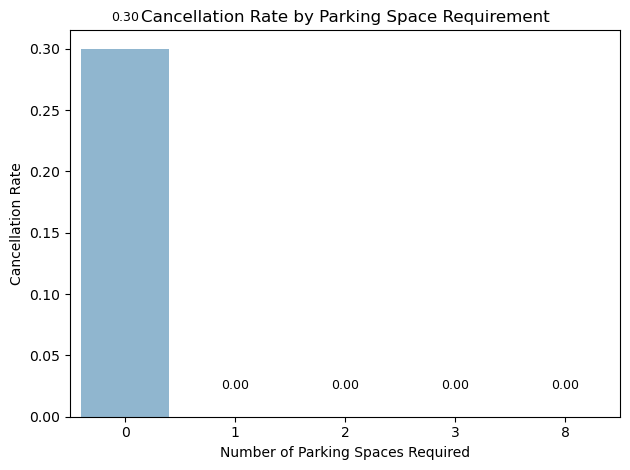

In [193]:
parking_cancel = df.groupby('required_car_parking_spaces')['is_canceled'].mean().reset_index()


ax = sns.barplot(data=parking_cancel, x='required_car_parking_spaces', y='is_canceled', palette='Blues_d')

plt.title('Cancellation Rate by Parking Space Requirement')
plt.xlabel('Number of Parking Spaces Required')
plt.ylabel('Cancellation Rate')

# Add value labels on top of each bar
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  
        height + 0.02,                     
        f'{height:.2f}',                    
        ha='center', va='bottom', fontsize=9
    )
plt.tight_layout()
plt.show()


Hotel type differences

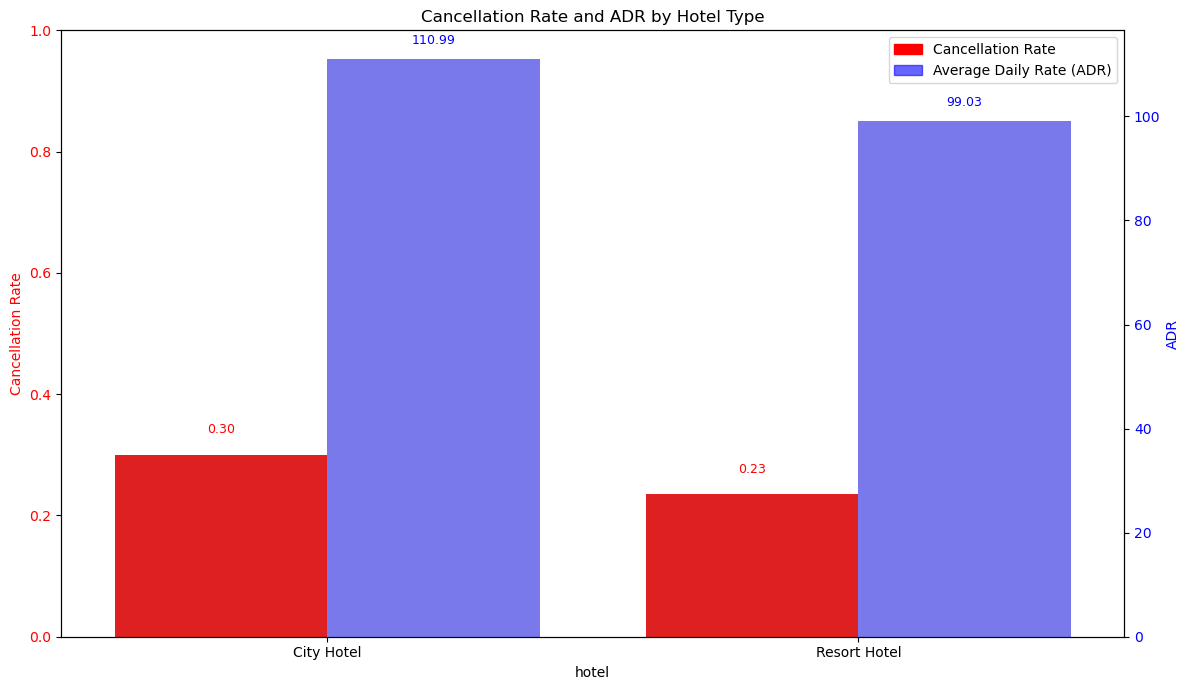

In [194]:
hotel_cancel = df.groupby('hotel')['is_canceled'].mean().reset_index()
hotel_adr = df.groupby('hotel')['adr'].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(12,7))

# Plot cancellation rate
sns.barplot(data=hotel_cancel, x='hotel', y='is_canceled', ax=ax1,
            color='red', width=0.4)
ax1.set_ylabel('Cancellation Rate', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_ylim(0, 1)

# Secondary y-axis for ADR
ax2 = ax1.twinx()
sns.barplot(data=hotel_adr, x='hotel', y='adr', ax=ax2,
            color='blue', alpha=0.6, width=0.4)
ax2.set_ylabel('ADR', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Offset bars
for bar in ax1.patches:
    bar.set_x(bar.get_x() - 0.2)
for bar in ax2.patches:
    bar.set_x(bar.get_x() + 0.2)

# Add values on top of cancellation bars (ax1)
for bar in ax1.patches:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width()/2, 
        height + 0.03,  # small offset above the bar
        f'{height:.2f}', 
        ha='center', 
        va='bottom', 
        color='red', 
        fontsize=9
    )

# Add values on top of ADR bars (ax2)
for bar in ax2.patches:
    height = bar.get_height()
    ax2.text(
        bar.get_x() + bar.get_width()/2, 
        height + (ax2.get_ylim()[1]*0.02),  # offset relative to ax2 y-limit
        f'{height:.2f}', 
        ha='center', 
        va='bottom', 
        color='blue', 
        fontsize=9
    )

# Create custom legend handles
red_patch = mpatches.Patch(color='red', label='Cancellation Rate')
blue_patch = mpatches.Patch(color='blue', alpha=0.6, label='Average Daily Rate (ADR)')

ax1.legend(handles=[red_patch, blue_patch], loc='upper right')

plt.title('Cancellation Rate and ADR by Hotel Type')
plt.tight_layout()
plt.show()


Time Series Trend of ADR and Bookings

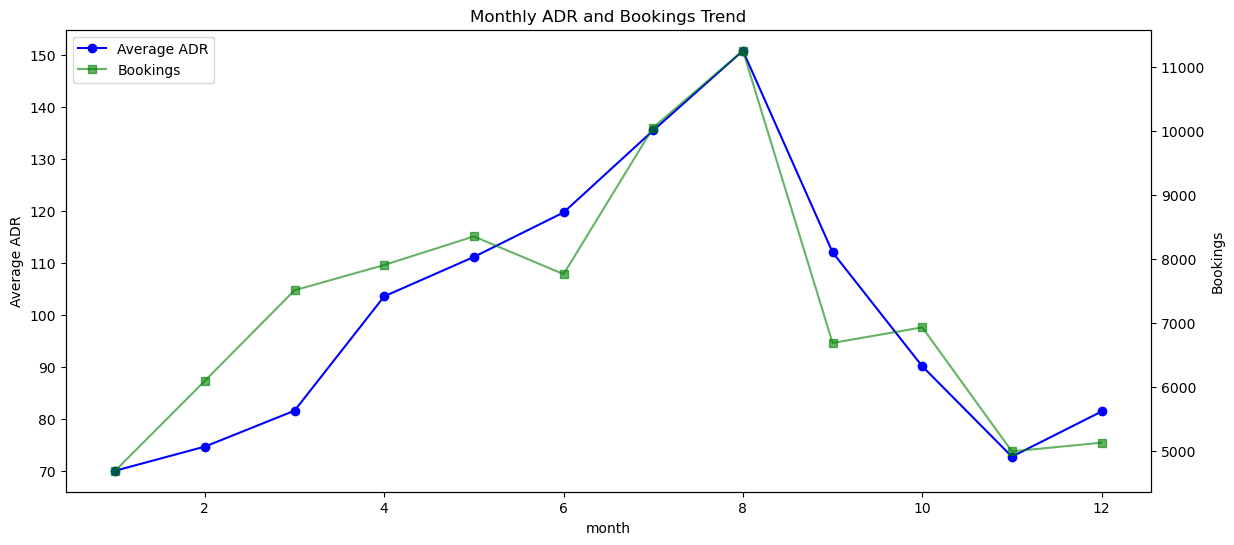

In [195]:
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot ADR with markers
ln1 = monthly_adr.plot(ax=ax1, color='blue', marker='o', label='Average ADR')
ax1.set_ylabel('Average ADR')

# Plot bookings on second y-axis with markers
ax2 = ax1.twinx()
ln2 = monthly_bookings.plot(ax=ax2, color='green', marker='s', label='Bookings', alpha=0.6)
ax2.set_ylabel('Bookings')

# Combine legends from both plots
lns = ln1.get_lines() + ln2.get_lines()
labels = [line.get_label() for line in lns]
ax1.legend(lns, labels, loc='upper left')

plt.title('Monthly ADR and Bookings Trend')
plt.show()


Top 10 Countries by Bookings and Cancellation Rate

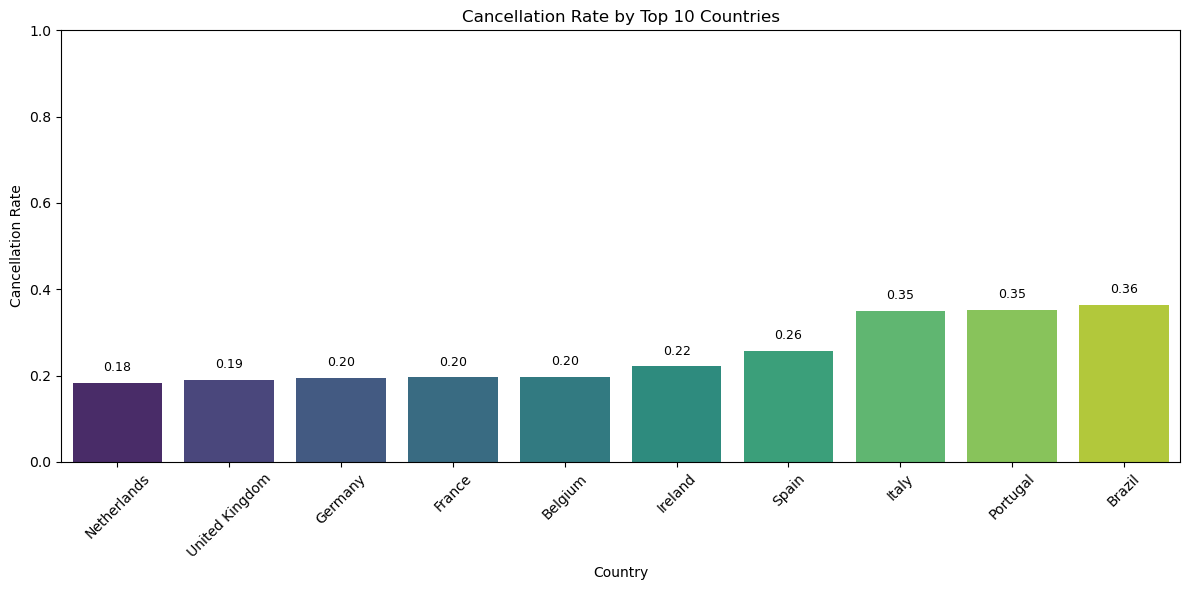

In [196]:
top_countries = df['country'].value_counts().head(10).index
country_cancel = (
    df[df['country'].isin(top_countries)]
    .groupby('country')['is_canceled']
    .mean()
    .sort_values()
)

plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=country_cancel.index, y=country_cancel.values, palette='viridis')

plt.xticks(rotation=45)
plt.title('Cancellation Rate by Top 10 Countries')
plt.ylabel('Cancellation Rate')
plt.xlabel('Country')
plt.ylim(0, 1)  # since cancellation rate is a proportion

# Add value labels on top of each bar
for bar in barplot.patches:
    height = bar.get_height()
    barplot.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.02,  # small offset above the bar
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )

plt.tight_layout()
plt.show()


Children vs Adults Stay Pattern

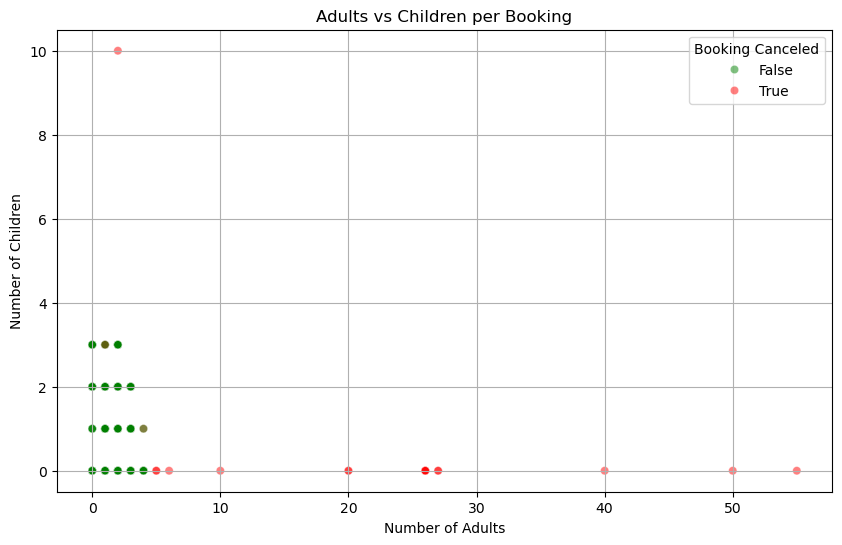

In [197]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='adults', y='children', alpha=0.5, hue='is_canceled', palette=['green', 'red'])

plt.title('Adults vs Children per Booking')
plt.xlabel('Number of Adults')
plt.ylabel('Number of Children')
plt.grid(True)
plt.legend(title='Booking Canceled')
plt.show()


In [198]:
df['month'] = df['arrival_date'].dt.month
monthly_bookings = df.groupby('month')['is_canceled'].count()
monthly_adr = df.groupby('month')['adr'].mean()
print(monthly_bookings)
print(monthly_adr)

month
1      4693
2      6098
3      7513
4      7908
5      8355
6      7765
7     10057
8     11257
9      6690
10     6934
11     4995
12     5131
Name: is_canceled, dtype: int64
month
1      70.050742
2      74.692033
3      81.609523
4     103.612589
5     111.195703
6     119.750120
7     135.542014
8     150.876120
9     112.081263
10     90.152518
11     72.754460
12     81.450226
Name: adr, dtype: float64


Cancellation Rate by Month

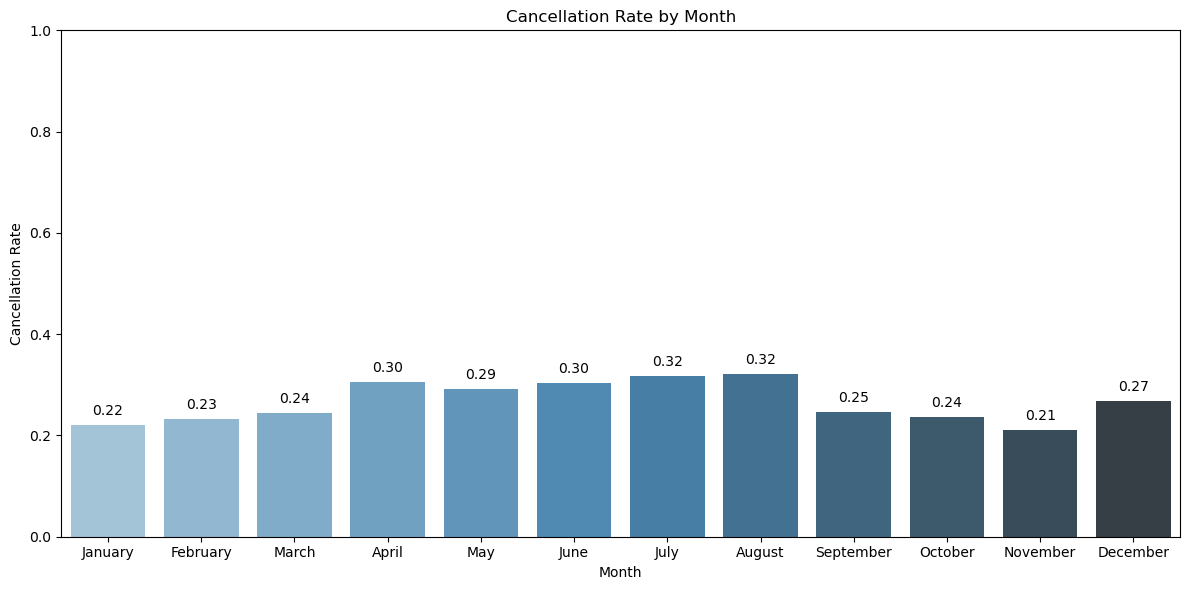

In [199]:
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

month_cancel['month_name'] = month_cancel['month'].map(month_names)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=month_cancel, x='month_name', y='is_canceled', palette='Blues_d')

plt.title('Cancellation Rate by Month')
plt.ylabel('Cancellation Rate')
plt.xlabel('Month')
plt.ylim(0, 1)

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,  
        height + 0.02,                
        f'{height:.2f}',             
        ha='center'
    )

plt.tight_layout()
plt.show()
